###### Word Cloud Submission by Arshveer Gahir for Python Crash Course Capstone

In [2]:
##Author: Arshveer Gahir

# Here are all the installs and imports you will need for your word cloud script and uploader widget

!pip install wordcloud
!pip install fileupload
!pip install ipywidgets
!jupyter nbextension install --py --user fileupload
!jupyter nbextension enable --py fileupload

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

Installing /Users/arshveergahir/opt/anaconda3/lib/python3.8/site-packages/fileupload/static -> fileupload
Up to date: /Users/arshveergahir/Library/Jupyter/nbextensions/fileupload/widget.js
Up to date: /Users/arshveergahir/Library/Jupyter/nbextensions/fileupload/extension.js
Up to date: /Users/arshveergahir/Library/Jupyter/nbextensions/fileupload/fileupload/widget.js
- Validating: OK

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable fileupload --user --py
    
Enabling notebook extension fileupload/extension...
      - Validating: OK


ModuleNotFoundError: No module named 'wordcloud'

In [3]:
# This is the uploader widget

def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

Uploaded `1342-0.txt` (771.81 kB)


In [17]:
# file_contents = "This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever.  You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org"


def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    uninteresting_words = ["the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just"]
    
    # LEARNER CODE START HERE
    
        #Process String Data into Lists 
        
    processed_file_contents = file_contents.split()
    processed_punctuations = punctuations.split()
    processed_words = []
    frequency_processed_words = {}
    
        #Iterate over each word
        
    for word in processed_file_contents:
        
        #Iterate over each alphabet of every VALID word
        if word.lower() not in uninteresting_words:
            clean_word = ""
            letters = word.split()
            for letter in letters:
                if letter not in processed_punctuations:
                    if letter.isalpha():
                        clean_word += letter
                        processed_words.append("".join(clean_word.upper()))
    
    
    
    for word in processed_words:
        if word not in frequency_processed_words.keys():
            frequency_processed_words[word] = 1
        else:
            frequency_processed_words[word] += 1
    
#wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(frequency_processed_words)
    return cloud.to_array()

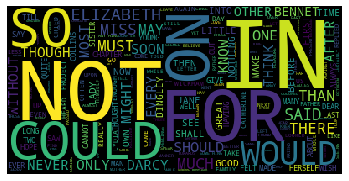

In [18]:
# Display your wordcloud image

myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()